# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="

In [19]:
print("Beginning Data Retrieval")
print ("-----------------------------")

record_count = 1
set_count = 1
city_data = []

for i,city in enumerate(cities):
    if(i%50==0 and i>=50):
        record_count=1
        set_count+=1
#         set_count = set_count + 1
    print(f"Processing record {record_count} of set {set_count} | {city} ")
    record_count += 1
    city_url=url+city
    try:
        city_weather=requests.get(city_url).json()
        city_data.append({
            "City":city,
            "Lat":city_weather["coord"]["lat"],
            "Lon":city_weather["coord"]["lon"],
            "Max Temp":city_weather["main"]["temp_max"],
            "Humidity":city_weather["main"]["humidity"],
            "Cloudiness":city_weather["clouds"]["all"],
            "Wind Speed":city_weather["wind"]["speed"],
            "Date":city_weather["dt"]
            
        })
    except:
        print("City not found.  Skipping...")
        pass
    
print("--------------")   
print("Data retrieval compleated.")
print ("-------------")


Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | nome 
Processing record 2 of set 1 | atuona 
Processing record 3 of set 1 | lebu 
Processing record 4 of set 1 | natal 
Processing record 5 of set 1 | khatanga 
Processing record 6 of set 1 | tasiilaq 
Processing record 7 of set 1 | nakuru 
Processing record 8 of set 1 | rikitea 
Processing record 9 of set 1 | port hardy 
Processing record 10 of set 1 | severo-kurilsk 
Processing record 11 of set 1 | santo tomas 
Processing record 12 of set 1 | ushuaia 
Processing record 13 of set 1 | vaini 
Processing record 14 of set 1 | treuchtlingen 
Processing record 15 of set 1 | nanortalik 
Processing record 16 of set 1 | belushya guba 
City not found.  Skipping...
Processing record 17 of set 1 | sur 
Processing record 18 of set 1 | volodarskiy 
Processing record 19 of set 1 | hongjiang 
Processing record 20 of set 1 | pouebo 
Processing record 21 of set 1 | new norfolk 
Processing record 22 of set 1 | albany 


Processing record 34 of set 4 | sao gabriel da cachoeira 
Processing record 35 of set 4 | san quintin 
Processing record 36 of set 4 | grand island 
Processing record 37 of set 4 | concarneau 
Processing record 38 of set 4 | chokurdakh 
Processing record 39 of set 4 | nizhneyansk 
City not found.  Skipping...
Processing record 40 of set 4 | pingliang 
Processing record 41 of set 4 | vestmannaeyjar 
Processing record 42 of set 4 | ahipara 
Processing record 43 of set 4 | colares 
Processing record 44 of set 4 | tiarei 
Processing record 45 of set 4 | kirovskiy 
Processing record 46 of set 4 | namatanai 
Processing record 47 of set 4 | reyes 
Processing record 48 of set 4 | galesong 
Processing record 49 of set 4 | palmer 
Processing record 50 of set 4 | ayr 
Processing record 1 of set 5 | ust-kuyga 
Processing record 2 of set 5 | halifax 
Processing record 3 of set 5 | sanandaj 
Processing record 4 of set 5 | altagracia de orituco 
Processing record 5 of set 5 | arnprior 
Processing rec

City not found.  Skipping...
Processing record 19 of set 8 | saleaula 
City not found.  Skipping...
Processing record 20 of set 8 | lasa 
Processing record 21 of set 8 | jahanabad 
Processing record 22 of set 8 | paamiut 
Processing record 23 of set 8 | vuktyl 
Processing record 24 of set 8 | puerto ayora 
Processing record 25 of set 8 | bambous virieux 
Processing record 26 of set 8 | itaituba 
Processing record 27 of set 8 | byron bay 
Processing record 28 of set 8 | valle de allende 
Processing record 29 of set 8 | honiara 
Processing record 30 of set 8 | palmas de monte alto 
Processing record 31 of set 8 | canico 
Processing record 32 of set 8 | amga 
Processing record 33 of set 8 | jinji 
Processing record 34 of set 8 | araouane 
Processing record 35 of set 8 | lufilufi 
Processing record 36 of set 8 | kampot 
Processing record 37 of set 8 | ukiah 
Processing record 38 of set 8 | vogar 
Processing record 39 of set 8 | nelson bay 
Processing record 40 of set 8 | shumerlya 
Process

Processing record 2 of set 12 | jumla 
Processing record 3 of set 12 | las guacamayas 
Processing record 4 of set 12 | tuatapere 
Processing record 5 of set 12 | dillon 
Processing record 6 of set 12 | lesogorskiy 
Processing record 7 of set 12 | zeya 
Processing record 8 of set 12 | touros 
Processing record 9 of set 12 | sembakung 
Processing record 10 of set 12 | shush 
Processing record 11 of set 12 | saint-joseph 
Processing record 12 of set 12 | klaksvik 
Processing record 13 of set 12 | bam 
Processing record 14 of set 12 | baculin 
Processing record 15 of set 12 | opuwo 
Processing record 16 of set 12 | mitchell 
Processing record 17 of set 12 | alice springs 
Processing record 18 of set 12 | vaitupu 
City not found.  Skipping...
Processing record 19 of set 12 | sitka 
Processing record 20 of set 12 | mitsamiouli 
Processing record 21 of set 12 | rocha 
Processing record 22 of set 12 | salmo 
Processing record 23 of set 12 | zhumadian 
Processing record 24 of set 12 | codringto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
cityD=pd.DataFrame(city_data)
cityD.to_csv(output_data_file)
cityD.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,nome,64.50,-165.41,-0.40,77,90,17.22,1580591349
1,atuona,-9.80,-139.03,81.57,75,0,18.92,1580591350
2,lebu,-37.62,-73.65,65.89,80,93,6.98,1580591350
3,natal,-5.79,-35.21,82.40,83,75,9.17,1580591233
4,khatanga,71.97,102.50,-29.36,96,55,10.80,1580591350


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

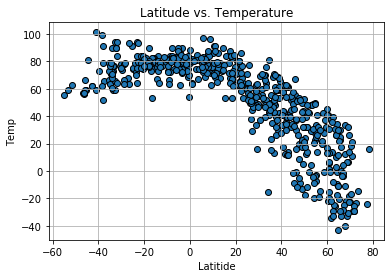

In [25]:
plt.scatter(cityD.Lat,cityD["Max Temp"],edgecolors="black")
plt.grid("both")
plt.title("Latitude vs. Temperature")
plt.ylabel("Temp")
plt.xlabel("Latitide")
plt.savefig("output_data/Latitude_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

In [22]:
cityD.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,nome,64.50,-165.41,-0.40,77,90,17.22,1580591349
1,atuona,-9.80,-139.03,81.57,75,0,18.92,1580591350
2,lebu,-37.62,-73.65,65.89,80,93,6.98,1580591350
3,natal,-5.79,-35.21,82.40,83,75,9.17,1580591233
4,khatanga,71.97,102.50,-29.36,96,55,10.80,1580591350


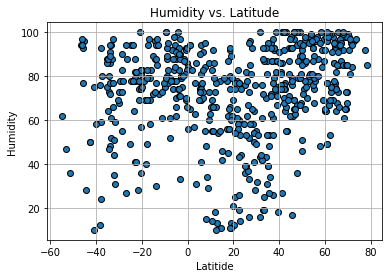

In [28]:
plt.scatter(cityD.Lat,cityD["Humidity"],edgecolors="black")
plt.grid("both")
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitide")
plt.savefig("output_data/Latitude_vs_Temp.png")
plt.show()

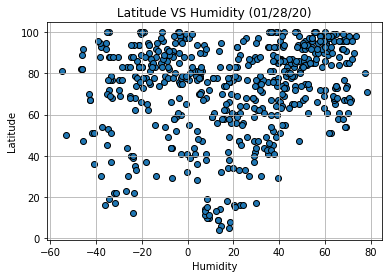

In [60]:
plt.scatter(x=cityD["Lat"], y =cityD.Humidity, edgecolors="black")
plt.title("Latitude VS Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid("both")
plt.savefig("output_data/Latitude_vs_Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

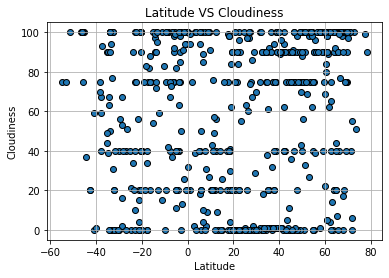

In [33]:
plt.scatter(x=cityD["Lat"], y =cityD.Cloudiness, edgecolors="black")
plt.title("Latitude VS Cloudiness" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid("both")
plt.savefig("output_data/Latitude_vs_Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

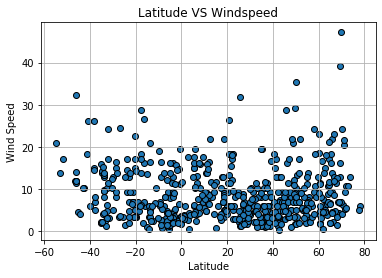

In [36]:
plt.scatter(cityD.Lat,cityD["Wind Speed"],edgecolors="black")

#plt.scatter(x=cityD["Lat"], y =cityD."Wind Speed" edgecolors="black")
plt.title("Latitude VS Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid("both")
plt.savefig("output_data/Latitude_vs_Wind Speed")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [39]:
# Create Northern and Southern Hemisphere DataFrames
cityD.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,nome,64.50,-165.41,-0.40,77,90,17.22,1580591349
1,atuona,-9.80,-139.03,81.57,75,0,18.92,1580591350
2,lebu,-37.62,-73.65,65.89,80,93,6.98,1580591350
3,natal,-5.79,-35.21,82.40,83,75,9.17,1580591233
4,khatanga,71.97,102.50,-29.36,96,55,10.80,1580591350


In [48]:
Northern = cityD[(cityD["Lat"]>0)]
Northern.head()
            
            
            #promising = data[(data['Drug Regimen'] == 'Capomulin') | (data['Drug Regimen'] == 'Ramicane') | \
                 #(data['Drug Regimen'] == 'Infubinol') | (data['Drug Regimen'] == 'Ceftamin')]



,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,nome,64.50,-165.41,-0.40,77,90,17.22,1580591349
4,khatanga,71.97,102.50,-29.36,96,55,10.80,1580591350
5,tasiilaq,65.61,-37.64,23.00,73,100,21.92,1580591350
8,port hardy,50.70,-127.42,39.20,86,75,3.36,1580591350
9,severo-kurilsk,50.68,156.12,12.60,74,0,13.29,1580591350


In [50]:
Southern = cityD[(cityD["Lat"]< 0)]
Southern.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,atuona,-9.80,-139.03,81.57,75,0,18.92,1580591350
2,lebu,-37.62,-73.65,65.89,80,93,6.98,1580591350
3,natal,-5.79,-35.21,82.40,83,75,9.17,1580591233
6,nakuru,-0.28,36.07,54.05,86,100,3.51,1580591350
7,rikitea,-23.12,-134.97,79.65,78,100,12.75,1580591350


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

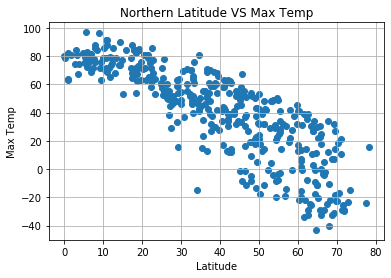

In [76]:
plt.scatter(Northern.Lat,Northern["Max Temp"])



plt.title("Northern Latitude VS Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid("both")
plt.savefig("output_data/Northern_Latitude_vs_Max_Temp")
plt.show()

#(slope,intercept,rvalue,pvalue, stderr)=linegress(x=Northern.Lat,Northern["Max Temp"])
#regress_values = Northern.Lat * slope + intercept




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

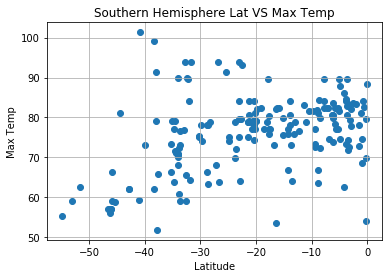

In [69]:
plt.scatter(Southern.Lat,Southern["Max Temp"])
plt.title("Southern Hemisphere Lat VS Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid("both")
plt.savefig("output_data/Southern_Latitude_vs_Max_Temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

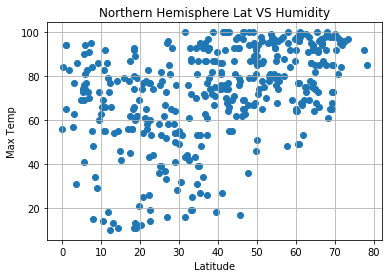

In [70]:
plt.scatter(Northern.Lat,Northern["Humidity"])
plt.title("Northern Hemisphere Lat VS Humidity")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid("both")
plt.savefig("output_data/Northern_Latitude_vs_Max_Temp")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

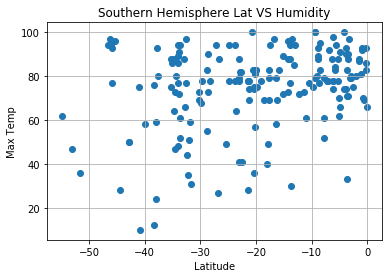

In [71]:
plt.scatter(Southern.Lat,Southern["Humidity"])

plt.title("Southern Hemisphere Lat VS Humidity")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid("both")
plt.savefig("output_data/Northern_Latitude_vs_Humidity")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

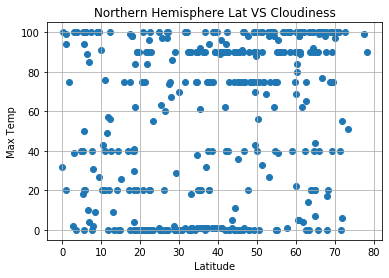

In [72]:
plt.scatter(Northern.Lat,Northern["Cloudiness"])


plt.title("Northern Hemisphere Lat VS Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid("both")
plt.savefig("output_data/Northern_Latitude_vs_Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

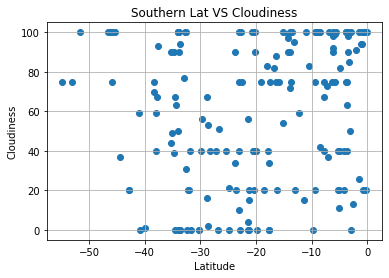

In [73]:
plt.scatter(Southern.Lat,Southern["Cloudiness"])

plt.title("Southern Lat VS Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid("both")
plt.savefig("output_data/Southern_Latitude_vs_Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

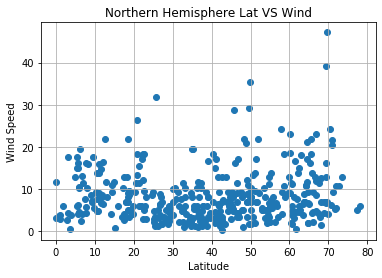

In [74]:
plt.scatter(Northern.Lat,Northern["Wind Speed"])

plt.title("Northern Hemisphere Lat VS Wind")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid("both")
plt.savefig("output_data/Northern_Latitude_vs_Wind")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

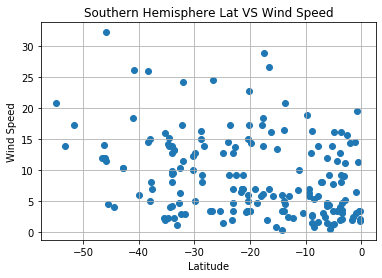

In [75]:
plt.scatter(Southern.Lat,Southern["Wind Speed"])


plt.title("Southern Hemisphere Lat VS Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid("both")
plt.savefig("output_data/Southern_Hemisphere_vs_Max_Temp")
plt.show()